<a href="https://colab.research.google.com/github/Kanyi254/sentiment-analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Twitter Sentiment Analysis for Apple and Google Products

## Summary

This project performs sentiment analysis on Twitter data from CrowdFlower for Apple and Google product lines. The purpose of this modelling is to understand the customer sentiment in regard to the products of these companies, developing both a binary and multiclass classification problem. Following NLP text pre-processing, feature extraction will be performed along with a series of machine learning modelling using Logistic Regression, Random Forest, and Support Vector Machines (SVM). The best model will be identified by accuracy, precision, recall, and F1-score metrics. Therefore, this sentiment analysis will be able to capture key insights on customer perceptions and allow businesses to fine-tune marketing and product strategies accordingly

## Business Understanding

The aim of this analysis is to understand how customers view the products of Apple and Google through tweets. Knowing whether public sentiment is positive, negative, or neutral is very helpful for product teams, marketing departments, and customer service units. It serves usefully in the following ways:

Improve product features: Companies are then able to identify which products or features are viewed positively or negatively and can then focus on changes in those areas to improve customer satisfaction.
This information can later be used to fine-tune marketing strategies: positive sentiment can be used in promotional campaigns, while negative sentiment may show the best avenue through which one can engage the customer.
Brand health monitoring: Overall brand perception allows you to understand customer loyalty and brand reputation.

##  Data Understanding

The dataset comes from CrowdFlower and contains Twitter sentiment data about Apple and Google products. Key features of the dataset include:

-  tweet_text: The main text of the tweets (free text data).
- emotion_in_tweet_is_directed_at:  The dataset identifies whether a tweet is about an Apple product or a Google product.
- is_there_an_emotion_directed_at_a_brand_or_product : The dataset is labeled with sentiment categories such as positive, negative, and neutral. There are also some cases labeled as "can't tell."

## 1.Import neccessary libraries

In [1]:
#importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## 2.Load and Inspect data

In [2]:
# Class creation

class DataUnderstanding:
  """Class for understanding the characteristics of the dataset"""
  def __init__(self, data= None):
    """Initialize the class with a DataFrame"""
    self.df= data

  def load_data(self, path):
    """Load data from a CSV file"""
    if self.df is None:
      self.df = pd.read_csv(path, encoding= 'latin-1')
    return self.df

  def preview_df(self):
    """Preview the DataFrame"""
    print("\n\nHEAD")
    print("-"*22)
    print(self.df.head())

  def display_info(self):
    """Display information about the DataFrame"""
    print("\n\nINFO")
    print("-"*22)
    print(self.df.info())

  def display_shape(self):
    """Display the shape of the DataFrame"""
    print("\n\nSHAPE")
    print("-"*22)
    print(f"Records: {self.df.shape[0]}, Features: {self.df.shape[1]}")

  def display_columns(self):
    """Display the columns in the dataset."""
    print("\nCOLUMNS")
    print("-" *22)
    for col in self.df.columns:
      print(f"- {col}")


  def display_missing_values(self):
    """Display missing values in each column"""
    print("\n\nMISSING VALUES")
    print("-"*22)
    for col in self.df.columns:
      print(f"{col}: {self.df[col].isnull().sum()}")

  def display_duplicates(self):
    """Display duplicate records in the DataFrame"""
    print("\n\nDUPLICATES")
    print("-"*22)
    print(f"Duplicate records: {self.df.duplicated().sum()}")

  def understand_data(self):
    """Display dataset overview"""
    self.preview_df()
    self.display_info()
    self.display_shape()
    self.display_columns()
    self.display_missing_values()
    self.display_duplicates()




In [3]:
# Load Data

data_und = DataUnderstanding()

df = data_und.load_data('/content/judge-1377884607_tweet_product_company.csv')

data_und.understand_data()



HEAD
----------------------
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  


INFO
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In essence, the dataset is designed to analyze sentiment, whether positive or negative, from tweets involving different products or brands.

The majority of these tweets - 5802 - don't specify any product or brand for which some decisions may be required in pre-processing.

The dataset is fairly clean; there are a few missing values in the 'tweet_text' and 'emotion_in_tweet_is_directed_at' columns and few duplicates.

## 3.Data Cleaning

In [4]:
#renaming columns for easier reference

df.rename (columns= {
    'tweet_text': 'tweets',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'
}, inplace=True)

In [5]:
# Handling duplicates

df.drop_duplicates(subset= 'tweets', inplace= True)

Handling missing values

In [6]:
# Drop the 1 in tweets column
df = df.dropna(subset=['tweets'])

In [7]:
# imputing missing values in product column with data from tweets

product_list = df['product'].unique()
product_list = [product for product in product_list if str(product) != 'nan']

def extract_product(tweet):
    for product in product_list:
        if product.lower() in tweet.lower():
            return product
    return None

df.loc[:, 'product']  = df.apply(lambda x: extract_product(x['tweets']) if pd.isna(x['product']) else x['product'], axis=1,)

df.head(5)

,tweets,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [8]:
df['product'].isnull().sum()

759

In [9]:
# drop the remaining
df = df.dropna(subset=['product'])

In [10]:
#check distribution of emotions
df['emotion'].value_counts()

,count
emotion,
No emotion toward brand or product,4633
Positive emotion,2955
Negative emotion,568
I can't tell,150


In [11]:
#drop records where emotion is i can't tell
df = df.drop(df[df['emotion'] == "I can't tell"].index)

In [12]:
# label emotion as 'positive', 'negative' and 'neutral'
df.loc[:, 'sentiment'] = df['emotion'].apply(lambda x: 'positive' if x == 'Positive emotion' else ('negative' if x == 'Negative emotion' else 'neutral'))
df.head()

,tweets,product,emotion,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive


In [13]:
#Ensure cleaning process worked effectively
data_und = DataUnderstanding(df)

data_und.understand_data()



HEAD
----------------------
                                              tweets             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

            emotion sentiment  
0  Negative emotion  negative  
1  Positive emotion  positive  
2  Positive emotion  positive  
3  Negative emotion  negative  
4  Positive emotion  positive  


INFO
----------------------
<class 'pandas.core.frame.DataFrame'>
Index: 8156 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     8156 non-null   object
 1   product    8156 non-null   object
 2   emotion    8156 non-null   ob

## 4.Exploratory Data Analysis

In this section, we perform exploratory data analysis (EDA) to gain insights into the sentiment of tweets related to different products. We will explore sentiment distribution, tweet length distribution, product mentions, and sentiment distribution among products.

###4.1 Sentiment Distribution

First, we examine the overall sentiment distribution in our dataset.

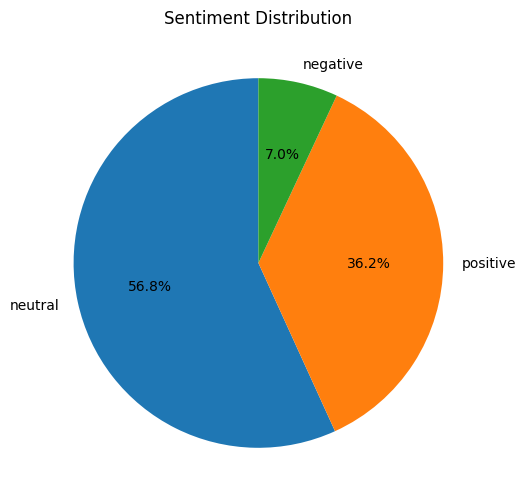

In [14]:
# First, we will explore the dataset to understand the distribution of sentiments in the tweets.
sentiment_counts = df['sentiment'].value_counts()

# piechart
plt.figure(figsize=(8, 6))
labels= sentiment_counts.index
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()


The pie chart above illustrates the sentiment distribution of the tweets. As seen, there is a significant class imbalance, with more than 50% of tweets expressing a neutral sentiment, 36.2% express positive sentiment while only about 7% express negative sentiment.

### 4.2 Tweet length distribution

Next, we analyze the distribution of tweet lengths to understand how many words are typically used in the tweets.

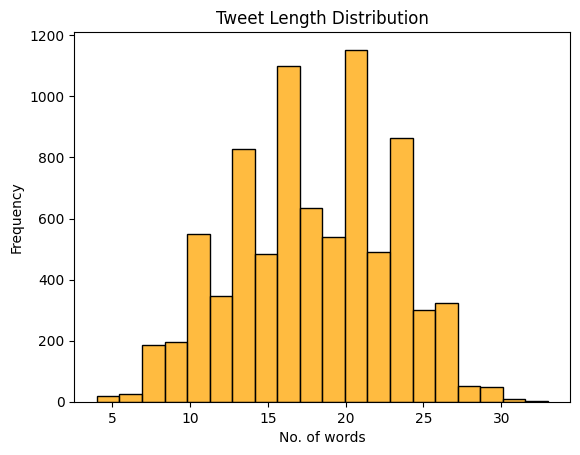

In [15]:
df['tweet_length'] = df['tweets'].apply(lambda x: len(x.split()))

sns.histplot(df['tweet_length'], bins=20, color= 'orange')
plt.title('Tweet Length Distribution')
plt.xlabel('No. of words')
plt.ylabel('Frequency')
plt.show()


The histogram shows that tweet lengths range from 4 to 33 words, indicating a variety of tweet lengths across the dataset.

### 4.3 Class Distribution by tweet length

We further explore how average tweet lengths vary by sentiment category.

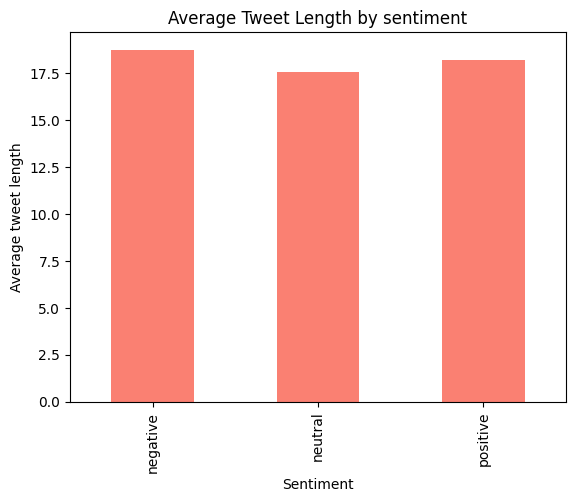

In [16]:
df.groupby('sentiment')['tweet_length'].mean().plot(kind='bar', color= 'salmon')
plt.title('Average Tweet Length by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average tweet length')
plt.show()


The bar chart indicates that the average tweet length for all three sentiment categories (positive, negative, and neutral) is almost equal, ranging between 17 to 18 words, suggesting that tweet length is consistent across different sentiments.

### 4.4 Distribution of products

Now, let's analyze the distribution of product mentions in the tweets.

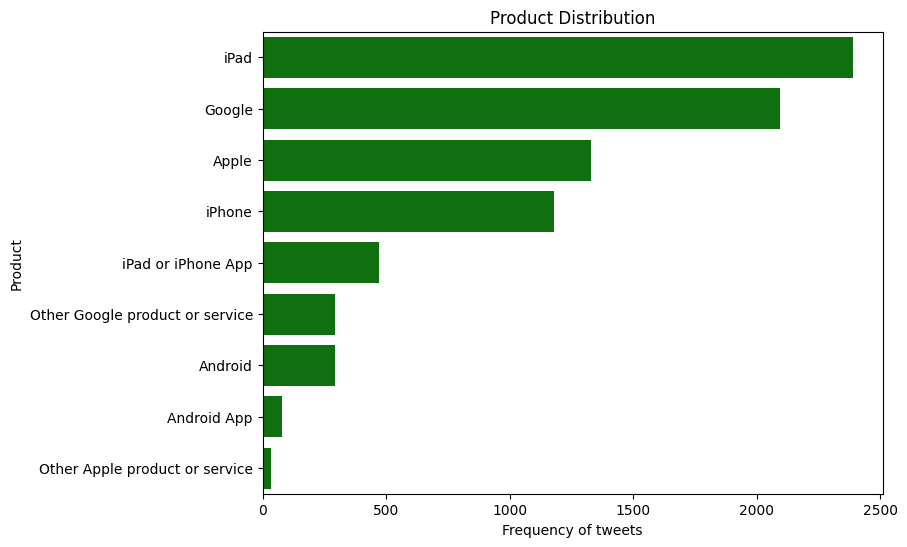

,count
product,
iPad,2390
Google,2093
Apple,1328
iPhone,1178
iPad or iPhone App,469
Other Google product or service,292
Android,291
Android App,80
Other Apple product or service,35


In [17]:
product_counts= df['product'].value_counts()

plt.figure(figsize= (8, 6))
labels= product_counts.index
sns.barplot(x= product_counts, y= labels, color= 'green')
plt.title('Product Distribution')
plt.xlabel('Frequency of tweets')
plt.ylabel('Product')
plt.show()

product_counts

The distribution plot of product distribution shows that iPad is the most mentioned product among the tweets, followed by Google and Apple, which proves these brands are on the hotlist and much discussed, whereas the rest of the products like Android and Apple services have been talked about far less.

### 4.5 Sentiment distribution for each product

Finally, we will visualize the sentiment distribution for each product to see how sentiments vary among different products.

<Figure size 800x600 with 0 Axes>

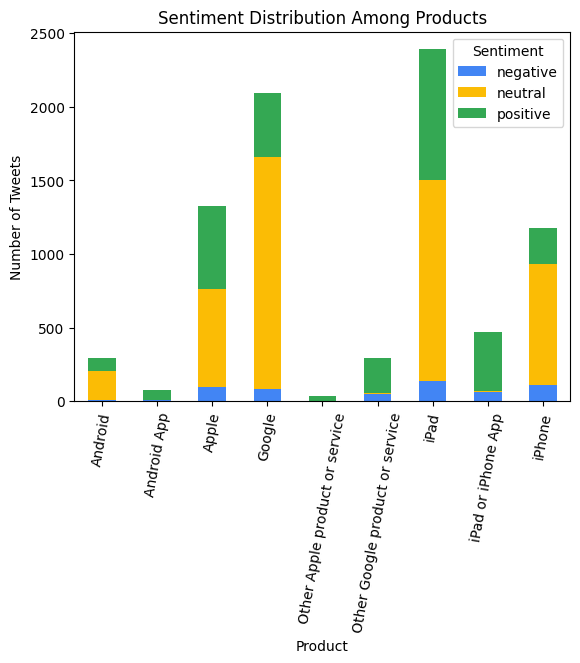

In [18]:
product_sentiment_counts = df.groupby('product')['sentiment'].value_counts().unstack().fillna(0)

#plot
plt.figure(figsize=(8, 6))

product_sentiment_counts.plot(kind='bar', stacked=True, color= ['#4285F4', '#FBBC05', '#34A853'])

plt.title('Sentiment Distribution Among Products')
plt.xlabel('Product')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=80)
plt.legend(title='Sentiment', labels=product_sentiment_counts.columns)

plt.show()


The stacked bar chart illustrates how sentiments vary across products. Each product has a unique sentiment distribution, providing valuable insights into consumer opinions on each brand.

## 5.Data Preprocessing

In this section, we will preprocess the tweet data to prepare it for sentiment analysis. This involves cleaning the text, removing unnecessary components, and applying natural language processing (NLP) techniques to enhance our dataset.

###5.1 Library Imports and NLTK Setup

First, we import the necessary libraries and download required NLTK resources for text processing.

This setup ensures that we have the tools needed for our preprocessing tasks.


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### 5.2 Text Preprocessing Classes
We define several transformer classes to handle different aspects of text preprocessing:

- TextCleaner: Removes URLs, mentions, hashtags, special characters, and excess whitespace.

- LowerCaseConverter: Converts text to lowercase for uniformity.
- StopwordRemover: Removes common English stopwords that do not add significant meaning.
- Tokenizer: Tokenizes the cleaned text into individual words.
- Lemmatizer: truncates words to their base forms for better analysis.

Here’s how each class is structured:

In [20]:
class TextCleaner(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def clean_text(text):
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
            text = re.sub(r'@\w+', '', text)  # Remove mentions
            text = re.sub(r'#\w+', '', text)  # Remove hashtags
            text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
            text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
            return text
        return [clean_text(text) for text in X]

class LowerCaseConverter(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text.lower() for text in X]

class StopwordRemover(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        stop_words = set(stopwords.words('english'))
        return [' '.join([word for word in text.split() if word not in stop_words]) for text in X]

class Tokenizer(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [word_tokenize(text) for text in X]

class Lemmatizer(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatizer = WordNetLemmatizer()
        # Process each token list and lemmatize tokens
        return [[lemmatizer.lemmatize(word) for word in tokens] for tokens in X]



###5.3 Creating the Text Preprocessing Pipeline
Next, we create a pipeline to streamline the preprocessing steps. This will apply each transformation sequentially.

We then apply the preprocessing pipeline to the tweets in our dataset, resulting in a cleaned and tokenized version of each tweet.

In [21]:
text_preprocessing_pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('lower_case_converter', LowerCaseConverter()),
    ('stopwords_remover', StopwordRemover()),
    ('tokenizer', Tokenizer()),
    ('lemmatizer', Lemmatizer())
])

df['processed_tweets'] = text_preprocessing_pipeline.fit_transform(df['tweets'])

df['cleaned_tweets'] = df['processed_tweets'].apply(lambda tokens: ' '.join(tokens))

df[['tweets', 'cleaned_tweets']].head(5)


,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...


###5.4 Visualizing the Most Common Words
Finally, we generate a word cloud to visualize the most common words present in the cleaned tweets. This provides a quick overview of the prevalent terms within the dataset.

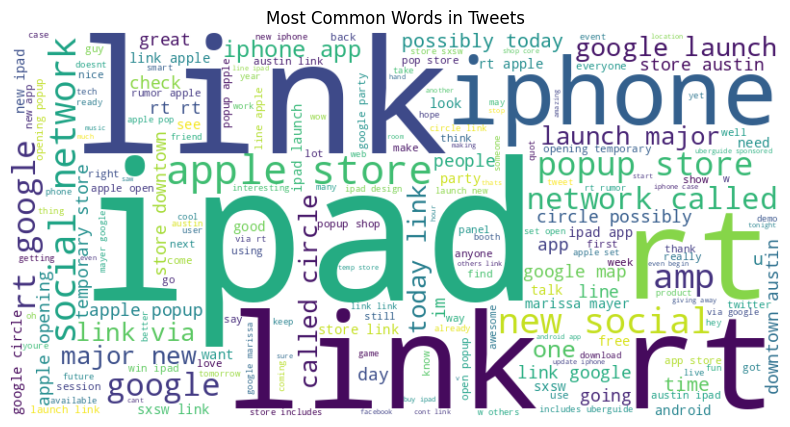

In [22]:
from wordcloud import WordCloud

# Combine all tweets into a single string for word cloud
all_words = ' '.join(df['cleaned_tweets'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


The word cloud visually represents the most frequently used words in the dataset, allowing us to quickly identify key themes. The size of each word decreases with its frequency of occurrence, making it easy to spot the most prevalent terms. For instance, at a glance, words like "iPad," "link," "Apple," "store," and "iPhone" stand out as some of the most tweeted words.

## 6.Feature Extraction

In this section, we will perform feature extraction on the tweet data to prepare it for training our machine learning models. This involves encoding the target variable (sentiment labels) and extracting features from the processed text using various vectorization techniques.

### 6.1 Library Imports

We begin by importing the necessary libraries required for feature extraction.

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


###6.2 Encoding the Target Variable
Before we can train our models, we need to encode the target variable (sentiment) into numerical format. This will allow the machine learning algorithms to interpret the sentiment labels correctly.

In [24]:
label_encoder = LabelEncoder()
df['sentiment_enc'] = label_encoder.fit_transform(df['sentiment'])

###6.3 Splitting the Data

We will now split the dataset into training and testing sets to evaluate our model’s performance accurately. This helps ensure that the model is trained on one subset of the data and tested on another, reducing the risk of overfitting.

In [25]:
# Define features and target variable
X = df['cleaned_tweets']
y = df['sentiment_enc']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


###6.4 Handling Class Imbalance

Our dataset has imbalanced classes. We handle this using SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class to balance the dataset.

In [26]:
 smote = SMOTE(random_state=42)

###6.4 Vectorization Techniques
Next, we will extract features from the cleaned tweets using two popular vectorization techniques:
- Count Vectorization :counts the frequency of words in the text, creating a document-term matrix.
- TF-IDF Vectorization: TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer adjusts the frequency counts by weighing the importance of words, reducing the influence of common terms.

In [27]:
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TF-IDF Vectorizer': TfidfVectorizer()
}

###6.5 Comparing Vectorization Techniques

To better understand the difference between these two techniques, we visualize the word distributions generated by both vectorizers. We'll plot the top 10 most frequent words in the dataset using each technique.

In [28]:
def plot_word_distribution(vectorizer, data, title):
    # Fit and transform the data
    X = vectorizer.fit_transform(data)

    # Sum up the occurrences of each word
    word_counts = X.toarray().sum(axis=0)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame for better visualization
    word_freq = pd.DataFrame({'Word': feature_names, 'Count': word_counts})
    word_freq = word_freq.sort_values(by='Count', ascending=False).head(10)

    # Plotting
    return word_freq

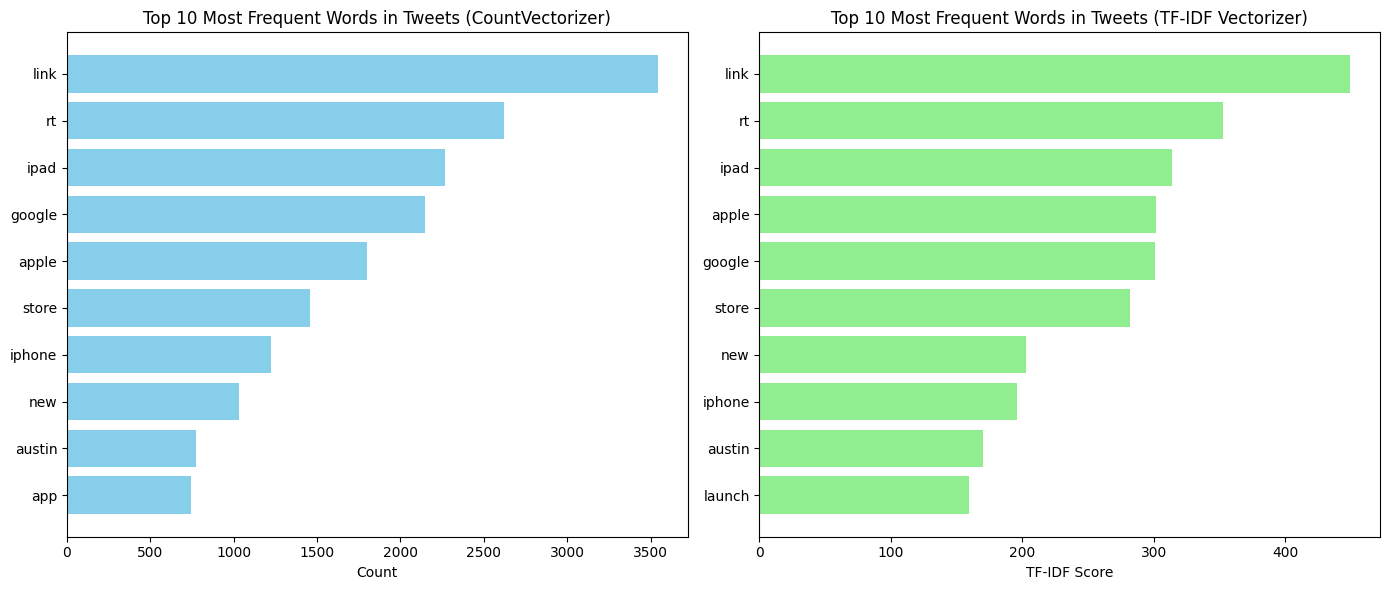

In [29]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for CountVectorizer
cv = CountVectorizer()
word_freq_cv = plot_word_distribution(cv, X, 'Top 10 Most Frequent Words in Tweets (CountVectorizer)')
axes[0].barh(word_freq_cv['Word'], word_freq_cv['Count'], color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Tweets (CountVectorizer)')
axes[0].invert_yaxis()  # Invert y axis for better readability
axes[0].set_xlabel('Count')

# Plot for TF-IDF Vectorizer
tfidf = TfidfVectorizer()
word_freq_tfidf = plot_word_distribution(tfidf, X, 'Top 10 Most Frequent Words in Tweets (TF-IDF Vectorizer)')
axes[1].barh(word_freq_tfidf['Word'], word_freq_tfidf['Count'], color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Tweets (TF-IDF Vectorizer)')
axes[1].invert_yaxis()  # Invert y axis for better readability
axes[1].set_xlabel('TF-IDF Score')

# Show the plot
plt.tight_layout()
plt.show()

CountVectorizer:
It prioritizes the most frequent words, with "link" (3,544), "rt" (2,621), and "ipad" (2,264) being the most common. These words are likely frequently used in the tweets, such as product names or shared links.

TF-IDF Vectorizer:
Weights words based on frequency and uniqueness. "link" (449.5), "rt" (352.9), and "ipad" (313.9) have high weights, but less frequent words like "launch" (159.6) carry more significance due to their contextual importance.

## 7.Modelling


In this section, we will handle both binary and multi-class classification for sentiment analysis. The following machine learning algorithms will be evaluated:
- LogisticRegression
- support vector machines (SVC)
- RandomForest
- DecisionTrees
- Naive Bayes(MultinomialNB)

In [30]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import pickle

###7.1 Binary Classification

To simplify our analysis, we'll filter the dataset to include only positive and negative sentiments (0 and 1). We will use LogisticRegression, support vector machines (SVC) and RandomForest models.

In [31]:
binary_df = df[df['sentiment_enc'].isin([0, 1])].reset_index(drop=True)


####7.1.1 Split the Data
Next, we split the binary dataset into training and testing sets.

In [32]:
X_binary = binary_df['cleaned_tweets']
y_binary = binary_df['sentiment_enc']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)



####7.1.2 Define Pipeline for vectorizers and SMOTE
In this section, we define a reusable pipeline that integrates vectorization techniques, class imbalance handling with SMOTE, and a machine learning model. This pipeline will streamline the process of feature extraction and model fitting, ensuring consistency across different vectorizers and models.

The vectorizer_pipeline function takes a machine learning model and a vectorizer as input and returns a pipeline that first applies vectorization, then SMOTE for class balancing, and finally trains the model.

In [33]:
def vectorizer_pipeline(model, vectorizer):
    return ImbPipeline([
        ('vectorizer', vectorizer),
        ('smote', smote),
        ('model', model)
    ])


###7.1.3 Evaluate Models with Vectorizers
We will evaluate each model with both vectorizers, fitting the model to the training data, making predictions, and collecting metrics.

Function 1: Training the Model

This function handles fitting the model pipeline (including vectorization, SMOTE, and model training) and making predictions.

In [34]:
def train_model(model, vectorizer, X_train, y_train, X_test):
    """
    Trains the pipeline with vectorizer, SMOTE, and model, then returns predictions.

    Args:
    - model: ML model
    - vectorizer: Vectorization method
    - X_train: Training data
    - y_train: Training labels
    - X_test: Test data

    Returns:
    - y_pred: Predictions for the test data
    """
    pipeline = vectorizer_pipeline(model, vectorizer)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return y_pred


Function 2: Evaluating the Model

This function takes the predictions from the trained model and evaluates them using various metrics such as accuracy, precision, recall, and F1-score. It also stores the confusion matrix.

In [35]:
def evaluate_model(model_name, vectorizer_name, y_test, y_pred):
    """
    Evaluates the model by calculating various classification metrics.

    Args:
    - model_name: Name of the model being evaluated
    - vectorizer_name: Name of the vectorizer used (Count or TF-IDF)
    - y_test: True labels
    - y_pred: Predicted labels

    Returns:
    - result: A dictionary containing evaluation metrics and model/vectorizer details
    """
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)

    result = {
        'Model': model_name,
        'Vectorizer': vectorizer_name,
        'Accuracy': accuracy,
        'Precision': classification_rep['1']['precision'],
        'Recall': classification_rep['1']['recall'],
        'F1-Score': classification_rep['1']['f1-score'],
        'Confusion Matrix': confusion_mat
    }

    return result


Main Loop: Training and Evaluation

The main loop calls the train_model and evaluate_model functions for each combination of models and vectorizers.

In [38]:
# Prepare a list to store results
results_comparison = []

# define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [39]:
# Prepare a list to store results
results_comparison = []

# Iterate over models and vectorizers, train and evaluate each combination
for model_name, model in models.items():
    for vectorizer_name, vectorizer in vectorizers.items():
        # Train the model
        y_pred = train_model(model, vectorizer, X_train_bin, y_train_bin, X_test_bin)

        # Evaluate the model
        result = evaluate_model(model_name, vectorizer_name, y_test_bin, y_pred)

        # Store the result
        results_comparison.append(result)

# Create a DataFrame from the results
results_comparison_df = pd.DataFrame(results_comparison)

# Display the results DataFrame
print(results_comparison_df)


                 Model         Vectorizer  Accuracy  Precision    Recall  \
0  Logistic Regression    CountVectorizer  0.823247   0.936121  0.862032   
1  Logistic Regression  TF-IDF Vectorizer  0.870317   0.955581  0.897326   
2        Decision Tree    CountVectorizer  0.706052   0.919893  0.736898   
3        Decision Tree  TF-IDF Vectorizer  0.863593   0.928649  0.918717   
4        Random Forest    CountVectorizer  0.778098   0.942211  0.802139   
5        Random Forest  TF-IDF Vectorizer  0.911623   0.919403  0.988235   

   F1-Score        Confusion Matrix  
0  0.897550  [[51, 55], [129, 806]]  
1  0.925538   [[67, 39], [96, 839]]  
2  0.818290  [[46, 60], [246, 689]]  
3  0.923656   [[40, 66], [76, 859]]  
4  0.866551  [[60, 46], [185, 750]]  
5  0.952577   [[25, 81], [11, 924]]  


####7.1.4 Plot Model Performance Metrics
We define functions to visualize model performance in terms of accuracy and F1-score, and to display confusion matrices for each model.

Function to Plot Metrics

This function handles plotting model performance (accuracy and F1-score) comparison.

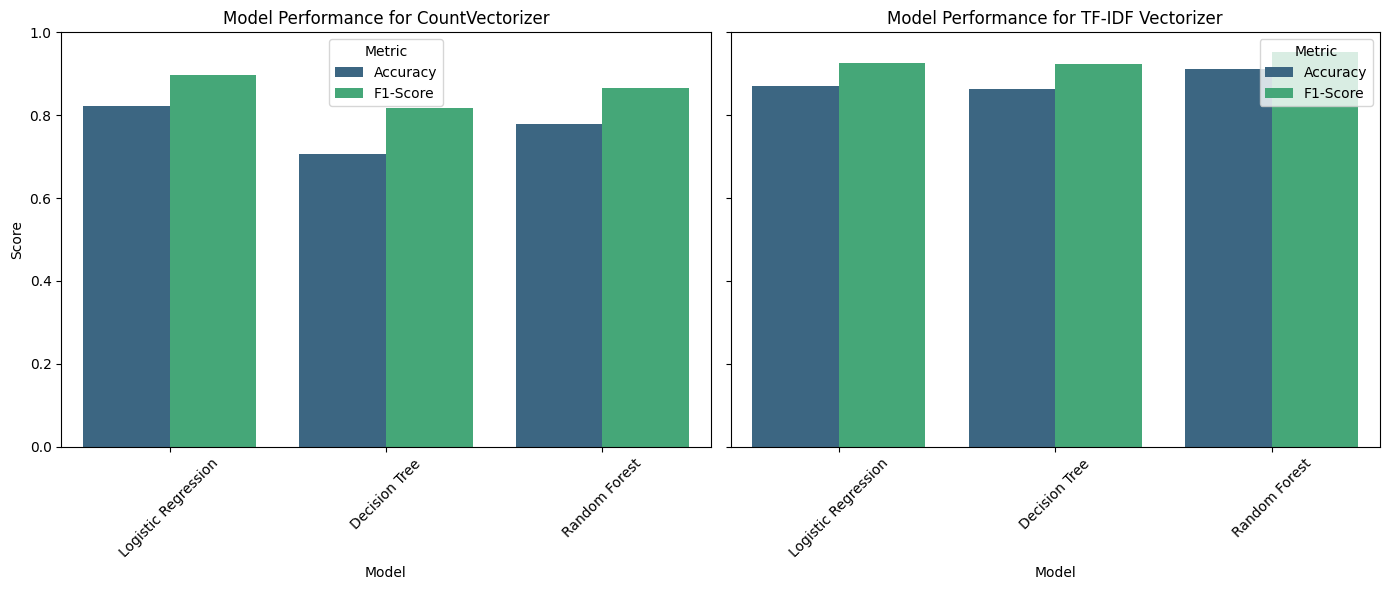

In [40]:
def plot_metrics(results_df):
    # Melt the DataFrame for easier plotting with seaborn
    metrics_df = results_df[['Model', 'Vectorizer', 'Accuracy', 'F1-Score']]
    metrics_df = metrics_df.melt(id_vars=['Model', 'Vectorizer'], var_name='Metric', value_name='Score')

    # Get unique vectorizers
    vectorizers = metrics_df['Vectorizer'].unique()

    # Create subplots for each vectorizer
    fig, axes = plt.subplots(nrows=1, ncols=len(vectorizers), figsize=(14, 6), sharey=True)

    for ax, vectorizer in zip(axes, vectorizers):
        vectorizer_df = metrics_df[metrics_df['Vectorizer'] == vectorizer]

        sns.barplot(data=vectorizer_df, x='Model', y='Score', hue='Metric', ax=ax, palette='viridis')
        ax.set_title(f'Model Performance for {vectorizer}')
        ax.set_ylabel('Score')
        ax.set_xlabel('Model')
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Metric')

    plt.tight_layout()
    plt.savefig('model_performance_metrics.png', dpi=300)
    plt.show()

plot_metrics(results_comparison_df)


- CountVectorizer generally results in lower accuracy and F1 scores, indicating potential issues with noise from common words that may not contribute significantly to sentiment differentiation.
- TF-IDF Vectorizer shows marked improvement in both metrics. The increased accuracy and F1 scores for TF-IDF models suggest they provide a more nuanced understanding of the sentiment in the tweets, leading to better classification performance overall.

In [41]:
results_comparison_df

,Model,Vectorizer,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,CountVectorizer,0.823247,0.936121,0.862032,0.897550,"[[51, 55], [129, 806]]"
1,Logistic Regression,TF-IDF Vectorizer,0.870317,0.955581,0.897326,0.925538,"[[67, 39], [96, 839]]"
2,Decision Tree,CountVectorizer,0.706052,0.919893,0.736898,0.818290,"[[46, 60], [246, 689]]"
3,Decision Tree,TF-IDF Vectorizer,0.863593,0.928649,0.918717,0.923656,"[[40, 66], [76, 859]]"
4,Random Forest,CountVectorizer,0.778098,0.942211,0.802139,0.866551,"[[60, 46], [185, 750]]"
5,Random Forest,TF-IDF Vectorizer,0.911623,0.919403,0.988235,0.952577,"[[25, 81], [11, 924]]"


Function to Plot Confusion Matrices

This function plots confusion matrices for each model and vectorizer combination.

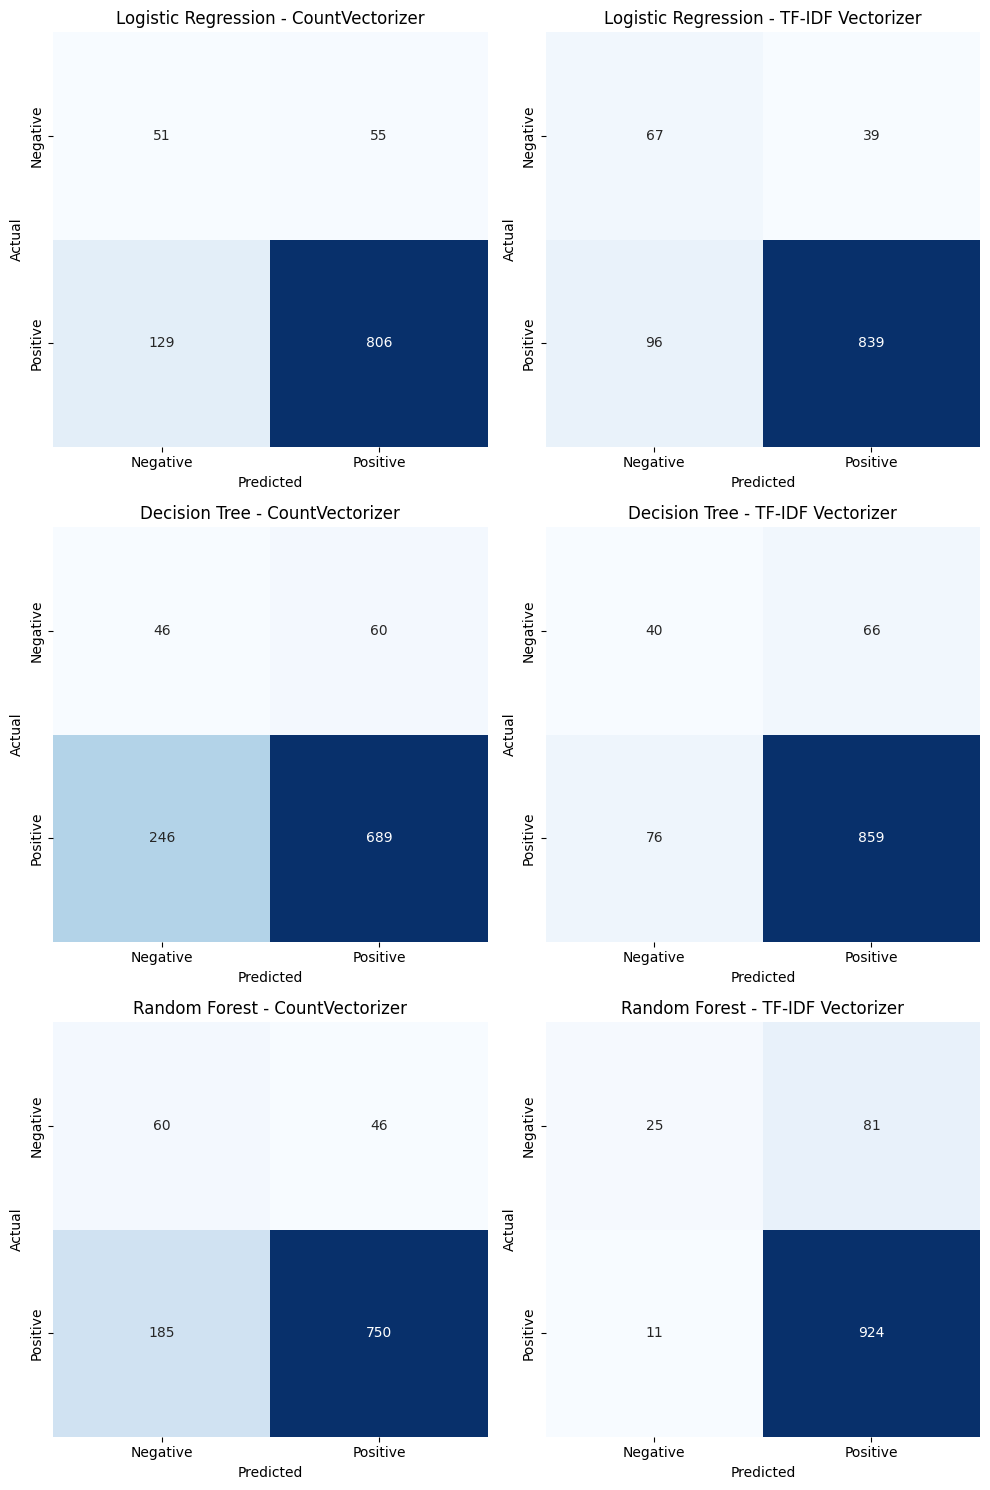

In [42]:
def plot_confusion_matrices(results_df):
    # Get unique models and calculate the number of rows needed
    models = results_df['Model'].unique()
    num_models = len(models)

    # Create subplots with the number of rows equal to the number of unique models and columns for each vectorizer
    fig, axes = plt.subplots(num_models, 2, figsize=(10, 5 * num_models))

    for model_idx, model in enumerate(models):
        # Filter results for the current model
        model_results = results_df[results_df['Model'] == model]

        for vec_idx, (vectorizer_name, row) in enumerate(zip(['CountVectorizer', 'TF-IDF Vectorizer'], model_results.iterrows())):
            conf_mat = row[1]['Confusion Matrix']
            ax = axes[model_idx, vec_idx]
            sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)
            ax.set_title(f"{model} - {vectorizer_name}")
            ax.set_ylabel('Actual')
            ax.set_xlabel('Predicted')

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(results_comparison_df)


CountVectorizer vs. TF-IDF Vectorizer: Generally, using TF-IDF Vectorizer leads to improved performance across all models, as indicated by increased true positive counts and decreased false negatives and false positives. This suggests that TF-IDF effectively highlights informative words while down-weighting less significant ones.

Model Performance: SVM with TF-IDF has the most balanced performance overall, achieving high recall and F1-scores, indicating effective sentiment classification.

False Positives/Negatives: False negatives are particularly important to monitor in sentiment analysis, as they represent missed positive sentiments. A high false positive rate can indicate that the model might be too liberal in its predictions.

####7.1.5 Hyperparameter Tuning
Next, we will perform hyperparameter tuning using GridSearchCV for each model and vectorizer combination to find the best hyperparameters that maximize the F1-score.

In [43]:
# Define hyperparameter grids as a separate function
def create_param_grids():
    """
    Creates hyperparameter grids for various models.

    Returns:
    - param_grids: Dictionary containing model names as keys and their respective parameter grids.
    """
    return {
        'Logistic Regression': {
            'model': LogisticRegression(),
            'param_grid': {
                'model__C': [0.01, 0.1, 1, 10, 100],
                'model__penalty': ['l2'],
                'model__solver': ['liblinear']  # can use 'lbfgs' for larger datasets
            }
        },
        'SVM': {
            'model': SVC(),
            'param_grid': {
                'model__C': [0.01, 0.1, 1, 10, 100],
                'model__kernel': ['linear', 'rbf']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'param_grid': {
                'model__n_estimators': [50, 100, 200],
                'model__max_depth': [None, 10, 20, 30],
                'model__min_samples_split': [2, 5, 10]
            }
        }
    }

# Store results
results = []

In [44]:
# Function for hyperparameter tuning
def tune_model(model_name, vectorizer, X_binary, y_binary):
    """
    Tunes a given model using GridSearchCV.

    Args:
    - model_name: Name of the model to tune.
    - vectorizer: Vectorizer to use in the pipeline.
    - X_binary: Feature data for binary classification.
    - y_binary: Target labels for binary classification.

    Returns:
    - dict: A dictionary containing the model name, vectorizer name, best parameters,
             best F1 score, best model, accuracy, precision, recall, and confusion matrix.
    """
    model_pipeline = ImbPipeline([
        ('vectorizer', vectorizer),
        ('smote', smote),  # Ensure `smote` is defined earlier in your code
        ('model', param_grids[model_name]['model'])  # Ensure `param_grids` is defined earlier
    ])

    # Initialize GridSearchCV with specified parameters
    grid_search = GridSearchCV(model_pipeline, param_grids[model_name]['param_grid'],
                               scoring='f1', cv=5, n_jobs=-1, verbose=1)

    # Fit the model to the data
    grid_search.fit(X_binary, y_binary)

    # Retrieve the best model
    best_model = grid_search.best_estimator_

    # Make predictions using the best model
    y_pred_tuned = best_model.predict(X_binary)

    # Calculate metrics
    accuracy = accuracy_score(y_binary, y_pred_tuned)
    precision = precision_score(y_binary, y_pred_tuned)
    recall = recall_score(y_binary, y_pred_tuned)
    f1 = f1_score(y_binary, y_pred_tuned)
    conf_matrix = confusion_matrix(y_binary, y_pred_tuned)

    return {
        'Model': model_name,
        'Vectorizer': 'CountVectorizer' if vectorizer == cv else 'TF-IDF Vectorizer',
        'Best Params': grid_search.best_params_,
        'Best F1 Score': grid_search.best_score_,
        'Best Model': best_model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Initialize results list
results = []

# Get the hyperparameter grids
param_grids = create_param_grids()

# Tune models with both CountVectorizer and TF-IDF Vectorizer
for model_name in param_grids.keys():
    for vectorizer in [cv, tfidf]:  # Ensure cv and tfidf are defined
        results.append(tune_model(model_name, vectorizer, X_binary, y_binary))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
                 Model         Vectorizer  \
0  Logistic Regression    CountVectorizer   
1  Logistic Regression  TF-IDF Vectorizer   
2                  SVM    CountVectorizer   
3                  SVM  TF-IDF Vectorizer   
4        Random Forest    CountVectorizer   
5        Random Forest  TF-IDF Vectorizer   

                                         Best Params  Best F1 Score  \
0  {'model__C': 10, 'model__penalty': 'l2', 'mode...       0.895144   
1  {'model__C': 100, 'model__penalty': 'l2', 'mod...       0.927961   
2            {'model__C': 1, 'model__kernel': 'rbf'}       0.916289   
3            {'model__C': 1, 'mode

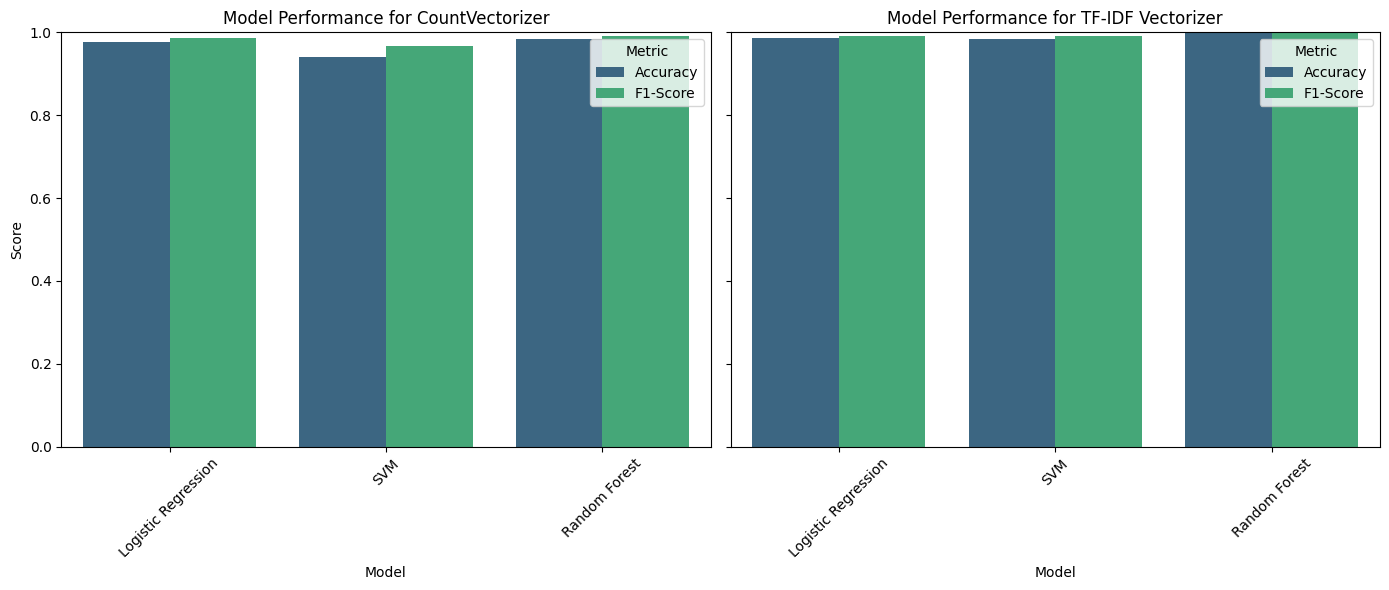

In [45]:
# Plot metrics and confusion matrices
plot_metrics(results_df)

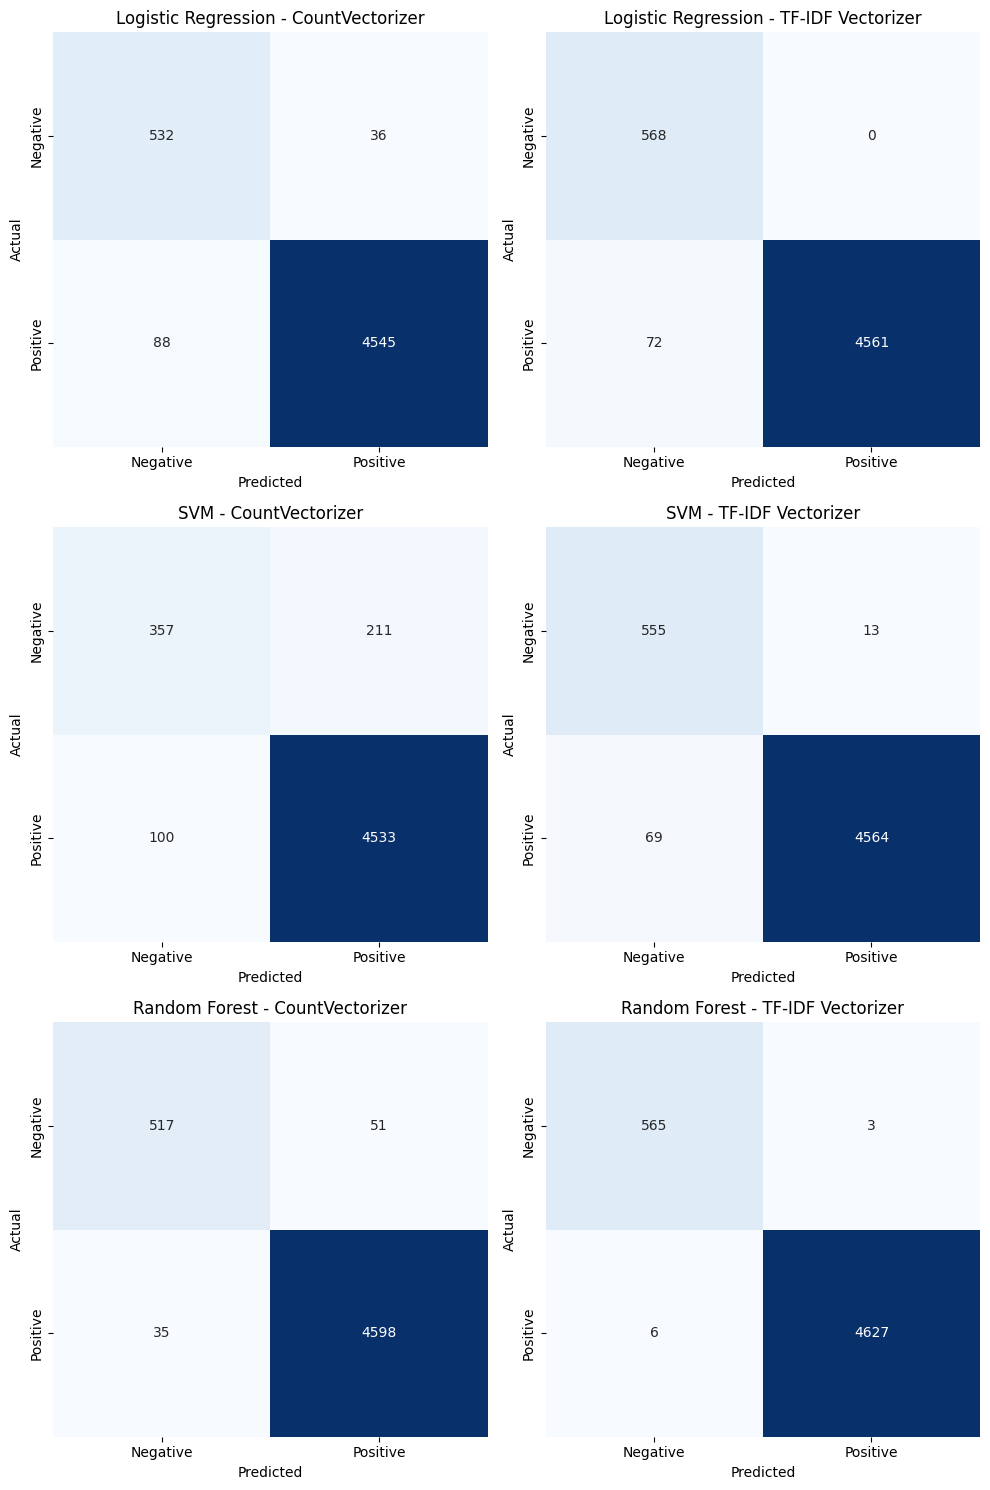

In [46]:
plot_confusion_matrices(results_df)

###7.2 Multiclass Classification
In this section, we will classify sentiments expressed in tweets about Apple and Google products into three categories: positive, negative, and neutral.

#### 7.2.1 Countverization

In [47]:
X = df['cleaned_tweets']
y = df['sentiment_enc']


In [48]:
cv = CountVectorizer()

X_vec = cv.fit_transform(df['cleaned_tweets'])
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(cv.vocabulary_)
X_vec.set_index(y.index, inplace=True)
X_vec = X_vec.iloc[:, 160:]

In [49]:
# SMOTE - CV
smote = SMOTE()
X_cv_smote, y_cv_smote = smote.fit_resample(X_vec, y)



In [50]:
# Train Test and split - CV
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv_smote, y_cv_smote, test_size=0.3, random_state=42)

####7.2.2 TFIDF Vectorization

In [51]:
tf = TfidfVectorizer()

X_tf = tf.fit_transform(df['cleaned_tweets'])
X_tf = pd.DataFrame.sparse.from_spmatrix(X_tf)
X_tf.columns = sorted(tf.vocabulary_)
X_tf.set_index(y.index, inplace=True)
X_tf = X_tf.iloc[:, 160:]

In [52]:
# SMOTE - TFIDF
smote = SMOTE(random_state=42)

X_tf_smote, y_tf_smote = smote.fit_resample(X_tf, y)

In [53]:
# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

####7.2.3 Modelling
Several classification models were tested, including:
- Multinomial Naive Bayes
- Random Forest
- Logistic Regression
- Decision Trees

In [54]:
def modelling(model, cv=False, tf=False):
    if cv:
        model.fit(X_train_cv, y_train_cv)
        y_hat = model.predict(X_test_cv)
        print("Count Vectorisation Results\n")
        print("Main Metrics")
        print("-"*12)
        print(f"Accuracy Score {round(accuracy_score(y_test_cv, y_hat), 3)}")
        print(f"Recall Score {round(recall_score(y_test_cv, y_hat, average='macro'), 3)}")
        print("\nClassification Report")
        print(classification_report(y_test_cv, y_hat))

    elif tf:
        model.fit(X_train_tf, y_train_tf)
        y_hat = model.predict(X_test_tf)
        print("TFIDF Vectorisation Results\n")
        print("Main Metrics")
        print("-"*12)
        print(f"Accuracy Score {round(accuracy_score(y_test_tf, y_hat), 3)}")
        print(f"Recall Score {round(recall_score(y_test_tf, y_hat, average='macro'), 3)}")
        print("\nClassification Report")
        print(classification_report(y_test_tf, y_hat))


In [55]:
def hyper_tuning(model, params, model_name="Random Forest"):
    """This function optimises the base model with the parameters
    passed as params"""
    # Grid Search Base Model
    grid_search_model = GridSearchCV(model, params, cv=5, scoring='accuracy')
    # Count Vectorisation
    # Perform grid search with 5-fold cross-validation for Count Vectorization
    grid_search_rf_cv = grid_search_model.fit(X_train_cv, y_train_cv)

    # Get the best model from grid search for Count Vectorization
    best_rf_model_cv = grid_search_rf_cv.best_estimator_

    # Predict on the test set using the best model for Count Vectorization
    y_pred_cv = best_rf_model_cv.predict(X_test_cv)

    # Calculate and print the accuracy for Count Vectorization
    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)

    # Calculate and print the recall for Count Vectorization
    recall_cv = recall_score(y_test_cv, y_pred_cv, average ='macro')


    # Results
    print("Count Vectorisation Results\n")
    print(f"Best {model_name.title()} Model (Count Vectorization):\n", best_rf_model_cv)
    print(f"\nTest Accuracy (Count Vectorization): {accuracy_cv:.3f}")
    print(f"\nTest Recall (Count Vectorization): {recall_cv:.3f}")
    print("---------")

    #TFIDF Vectorisation
    grid_search_rf_tf = grid_search_model.fit(X_train_tf, y_train_tf)

    # Get the best model from grid search for TF-IDF Vectorization
    best_rf_model_tf = grid_search_rf_tf.best_estimator_

    # Predict on the test set using the best model for TF-IDF Vectorization
    y_pred_tf = best_rf_model_tf.predict(X_test_tf)

    # Calculate and print the accuracy for TF-IDF Vectorization
    accuracy_tf = accuracy_score(y_test_tf, y_pred_tf)

    # Calculate and print the reacll for TF-IDF Vectorization
    recall_tf= recall_score(y_test_tf, y_pred_tf, average ='macro')

    # Results
    print("\n\nTFIDF Vectorisation Results\n")
    print(f"Best {model_name.title()} Model (TFIDF Vectorization):\n", best_rf_model_tf)
    print(f"\nTest Accuracy (TFIDF Vectorization): {accuracy_tf:.3f}")
    print(f"\nTest Recall (TFIDF Vectorization): {recall_tf:.3f}")

    # models = [best_rf_model_cv, best_rf_model_tf]

    return best_rf_model_cv, best_rf_model_tf

Model 1 - Multinomial Bayes - CV Data

In [56]:
# Instantiate the multinomialnb model
mnb = MultinomialNB()

In [57]:
# Classification report of the multinomial using the Count Vectorization
modelling(model=mnb, cv=True)
# Classification report of the multinomial using the TFIDF Vectorization
modelling(model=mnb, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.584
Recall Score 0.585

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.54      0.61      1412
           1       0.60      0.60      0.60      1403
           2       0.49      0.61      0.54      1355

    accuracy                           0.58      4170
   macro avg       0.60      0.58      0.59      4170
weighted avg       0.60      0.58      0.59      4170

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.758
Recall Score 0.757

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1412
           1       0.71      0.60      0.65      1403
           2       0.69      0.73      0.71      1355

    accuracy                           0.76      4170
   macro avg       0.75      0.76      0.75      4170
weighted avg       0.75      0.76      0.75      4170



Hyperparameter Tuning the MNB Model


In [58]:
# params
mnb_param_grid = {
    'alpha': [0.01, 0.1]
}

# GridSearchCV for tuning
tuned_mnb_cv_model, tuned_mnb_tf_model = hyper_tuning(model=mnb, params=mnb_param_grid, model_name="MNB")

Count Vectorisation Results

Best Mnb Model (Count Vectorization):
 MultinomialNB(alpha=0.01)

Test Accuracy (Count Vectorization): 0.627

Test Recall (Count Vectorization): 0.626
---------


TFIDF Vectorisation Results

Best Mnb Model (TFIDF Vectorization):
 MultinomialNB(alpha=0.01)

Test Accuracy (TFIDF Vectorization): 0.794

Test Recall (TFIDF Vectorization): 0.793


 The accuracy score is at 80% which is an improvement from 77%. The models improvement is due to tuning

Model 2 - Random Forest

In [59]:
# Instantiate a random forest model
# Set `n_estimators = 1000` , `max_features = 5` and `max_depth = 5`
rf = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=5)

In [60]:
modelling(model=rf, cv=True)
modelling(model=rf, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.419
Recall Score 0.426

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.12      0.21      1412
           1       0.75      0.21      0.32      1403
           2       0.36      0.95      0.52      1355

    accuracy                           0.42      4170
   macro avg       0.68      0.43      0.35      4170
weighted avg       0.68      0.42      0.35      4170

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.62
Recall Score 0.623

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1412
           1       0.83      0.14      0.24      1403
           2       0.46      0.97      0.63      1355

    accuracy                           0.62      4170
   macro avg       0.76      0.62      0.57      4170
weighted avg       0.76      0.62      0.57      4170



Hyperparameter tuning the Random Forest Classifier

In [61]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state= 42)

# Define the parameter grid with the necessary hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30]
}

tuned_rf_cv_model, tuned_rf_tf_model = hyper_tuning(model=rf, params=rf_param_grid, model_name="Random Forest")

Count Vectorisation Results

Best Random Forest Model (Count Vectorization):
 RandomForestClassifier(n_estimators=200, random_state=42)

Test Accuracy (Count Vectorization): 0.687

Test Recall (Count Vectorization): 0.685
---------


TFIDF Vectorisation Results

Best Random Forest Model (TFIDF Vectorization):
 RandomForestClassifier(n_estimators=200, random_state=42)

Test Accuracy (TFIDF Vectorization): 0.816

Test Recall (TFIDF Vectorization): 0.815



> The significant improvement in test accuracy from 0.50 to 0.70 in the model using Count Vectorization.

> Note the improvement from 0.71 to 0.837 for the model using TF-IDF Vectorization

> We can note an indication that TF-IDF provides a superior feature representation for the Random Forest model.

Model 3 - Logistic Regression

In [62]:
# Instantiate the Logistic Regression Model
lr = LogisticRegression(max_iter=200)

In [63]:
modelling(model=lr, cv=True)
modelling(model=lr, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.693
Recall Score 0.691

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1412
           1       0.68      0.65      0.67      1403
           2       0.62      0.56      0.59      1355

    accuracy                           0.69      4170
   macro avg       0.69      0.69      0.69      4170
weighted avg       0.69      0.69      0.69      4170

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.793
Recall Score 0.792

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1412
           1       0.72      0.72      0.72      1403
           2       0.75      0.72      0.73      1355

    accuracy                           0.79      4170
   macro avg       0.79      0.79      0.79      4170
weighted avg       0.79      0.79      0.79      4170



In [64]:
# A secondary model manually tuned
lr_tune = LogisticRegression(max_iter=3000, C=100, solver='liblinear')
modelling(lr_tune, cv=True)
modelling(lr_tune, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.694
Recall Score 0.692

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1412
           1       0.69      0.65      0.67      1403
           2       0.60      0.57      0.58      1355

    accuracy                           0.69      4170
   macro avg       0.69      0.69      0.69      4170
weighted avg       0.69      0.69      0.69      4170

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.813
Recall Score 0.812

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1412
           1       0.75      0.70      0.73      1403
           2       0.74      0.76      0.75      1355

    accuracy                           0.81      4170
   macro avg       0.81      0.81      0.81      4170
weighted avg       0.81      0.81      0.81      4170



Hyperparameter Tuning Logistic Regression Model

In [65]:
# Parameter Tuning
c_space = np.linspace(30, 32, 3)
max_iters = [100, 150, 200]
solvers = ["lbfgs", "liblinear"]
lr_param_grid = { 'C': c_space, 'max_iter':max_iters }
tuned_lr_cv_model, tuned_lr_tf_model = hyper_tuning(model=lr, params=lr_param_grid, model_name="Logistic Regression")

Count Vectorisation Results

Best Logistic Regression Model (Count Vectorization):
 LogisticRegression(C=31.0)

Test Accuracy (Count Vectorization): 0.692

Test Recall (Count Vectorization): 0.690
---------


TFIDF Vectorisation Results

Best Logistic Regression Model (TFIDF Vectorization):
 LogisticRegression(C=31.0, max_iter=150)

Test Accuracy (TFIDF Vectorization): 0.814

Test Recall (TFIDF Vectorization): 0.813


> The significant improvement in test accuracy from 0.70 to 0.83 in the Count Vectorization based model.

> TF-IDF Vectorization-based model improved from 0.808 to 0.831.

> Further indication that the TFIDF vectorisation is better

Model 4 - Decision Trees

In [66]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

In [67]:
# Decision tree with tfidf vectorization
modelling(dt, cv=True)
modelling(dt, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.677
Recall Score 0.675

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1412
           1       0.66      0.59      0.62      1403
           2       0.60      0.52      0.56      1355

    accuracy                           0.68      4170
   macro avg       0.67      0.67      0.67      4170
weighted avg       0.67      0.68      0.67      4170

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.744
Recall Score 0.743

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1412
           1       0.66      0.65      0.66      1403
           2       0.68      0.67      0.67      1355

    accuracy                           0.74      4170
   macro avg       0.74      0.74      0.74      4170
weighted avg       0.74      0.74      0.74      4170



In [68]:
# A secondary model manually tuned
dt2 = DecisionTreeClassifier(max_depth=1000 , criterion='entropy', min_samples_split=4, min_samples_leaf=5)
modelling(dt2, cv=True)
modelling(dt2, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.607
Recall Score 0.605

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1412
           1       0.59      0.52      0.56      1403
           2       0.54      0.44      0.48      1355

    accuracy                           0.61      4170
   macro avg       0.60      0.60      0.59      4170
weighted avg       0.60      0.61      0.60      4170

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.714
Recall Score 0.713

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1412
           1       0.64      0.65      0.64      1403
           2       0.62      0.62      0.62      1355

    accuracy                           0.71      4170
   macro avg       0.71      0.71      0.71      4170
weighted avg       0.72      0.71      0.71      4170



Hyper Parameter Tuning the Decision Tree Model

In [69]:
dt_param_grid = {"criterion": ['gini', 'entropy'],
                 "max_features" : [5],
                 "min_samples_split":[4, 5, 6]}

tuned_dt_cv_model, tuned_dt_tf_model = hyper_tuning(model=dt, params=dt_param_grid, model_name="Decision Tree")

Count Vectorisation Results

Best Decision Tree Model (Count Vectorization):
 DecisionTreeClassifier(criterion='entropy', max_features=5, min_samples_split=6)

Test Accuracy (Count Vectorization): 0.643

Test Recall (Count Vectorization): 0.641
---------


TFIDF Vectorisation Results

Best Decision Tree Model (TFIDF Vectorization):
 DecisionTreeClassifier(max_features=5, min_samples_split=4)

Test Accuracy (TFIDF Vectorization): 0.746

Test Recall (TFIDF Vectorization): 0.745


> The significant improvement in test accuracy from 0.68 to 0.682 in the Count Vectorization based model.

> TF-IDF Vectorization-based model reduced accuracy performance from 0.76 to 0.0.754.

> Further indication that the TFIDF vectorisation is better

Evaluation

In [70]:
# TFIDF Models used
models = ['MultinomialNB', 'Tuned MultinomialNB',
          'RandomForest', 'Tuned RandomForest',
          'LogisticRegression', 'Tuned LogisticRegression',
          'Decision Tree', 'Tuned Decision Tree']

# Scores
model_accuracy_scores = [0.765, 0.8, 0.71, 0.837, 0.808, 0.837, 0.76, 0.754]
model_recall_scores =   [0.764, 0.8, 0.71, 0.836, 0.807, 0.836, 0.76, 0.753]



# Creating a dictionary with model names as keys and metric scores as values
data = {
    "models": models,
    "accuracy": model_accuracy_scores,
    "recall": model_recall_scores
}

# Creating the DataFrame
evaluation_df = pd.DataFrame(data=data)

# Sort Order
evaluation_df.sort_values(by='accuracy', ascending=True, inplace=True)

# Displaying the DataFrame
print("Resuts with TF-IDF")
print(evaluation_df)


Resuts with TF-IDF
                     models  accuracy  recall
2              RandomForest     0.710   0.710
7       Tuned Decision Tree     0.754   0.753
6             Decision Tree     0.760   0.760
0             MultinomialNB     0.765   0.764
1       Tuned MultinomialNB     0.800   0.800
4        LogisticRegression     0.808   0.807
3        Tuned RandomForest     0.837   0.836
5  Tuned LogisticRegression     0.837   0.836


 We found the best model to be `Random Forest Model` and `Logistic Regression` both with the highest accuracy scores of 83.7%.

In [71]:
modelling(model=tuned_rf_tf_model, tf=True)

TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.816
Recall Score 0.815

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1412
           1       0.70      0.81      0.75      1403
           2       0.78      0.69      0.73      1355

    accuracy                           0.82      4170
   macro avg       0.82      0.81      0.82      4170
weighted avg       0.82      0.82      0.82      4170



####7.2.4 Deployment

In [72]:
# Convert the trained model into a format suitable for deployment
pickle_models = [tuned_mnb_tf_model, tuned_rf_tf_model, tuned_dt_tf_model, tuned_lr_tf_model]
pickle_names = ["tuned_mnb_tf_model.pkl", "tuned_rf_tf_model.pkl", "tuned_dt_tf_model.pkl",
                "tuned_lr_tf_model.pkl"]

for name, model in zip(pickle_names, pickle_models):
  pickle.dump(model, open(name, 'wb'))

# The Product categories
products = list(df.emotion.unique())
pickle.dump(products, open('products.pkl', 'wb'))

# The Model Evaluation Results
pickle.dump(evaluation_df, open('evaluation_df.pkl', 'wb'))

# Create the directory if it doesn't exist
!mkdir models

# Save the labels
pickle.dump(label_encoder.classes_, open("./models/labels.pkl", 'wb'))

In [75]:
# Initialize the vectorizer and fit on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df["cleaned_tweets"])

# SMOTE - TFIDF
X_tf_smote, y_tf_smote = smote.fit_resample(X_train_tfidf, y)

# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

# Save Vectorizer
pickle.dump(vectorizer, open('./models/vectorizer.pkl', 'wb'))

# Load the model
# Moved below fitting and saving the model
#with open('./models/tuned_lr_tf_model.pkl', 'rb') as file:
#    model = pickle.load(file)

model.fit(X_train_tf, y_train_tf)  # Sample target values

# Save the fit model
pickle.dump(model, open('./models/tuned_lr_tf_model.pkl', 'wb'))

# Load the model
# Moved here after fitting and saving the model
with open('./models/tuned_lr_tf_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Prediction
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove punctuation and stop words, and lemmatize the tokens
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in string.punctuation and token not in stop_words
    ]

    return ' '.join(cleaned_tokens)

# Example text to be processed and predicted
text = "I had a bad time hanging out at the conference."

# Preprocess the text
cleaned_text = preprocess_text(text)

# Transform the cleaned text to TF-IDF representation using the loaded vectorizer
text_tfidf = vectorizer.transform([cleaned_text])

# Make prediction using the loaded model
prediction = model.predict(text_tfidf)

# Return sentiment label
print(label_encoder.classes_[prediction[0]])

neutral


#### 7.2.5 The Prediction Process

In [73]:
# Initialize the vectorizer and fit on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df["cleaned_tweets"])

# SMOTE - TFIDF
X_tf_smote, y_tf_smote = smote.fit_resample(X_train_tfidf, y)

# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

# Save Vectorizer
pickle.dump(vectorizer, open('./models/vectorizer.pkl', 'wb'))

# Load the model
with open('./models/tuned_lr_tf_model.pkl', 'rb') as file:
    model = pickle.load(file)

model.fit(X_train_tf, y_train_tf)  # Sample target values

# Save the fit model
pickle.dump(model, open('./models/tuned_lr_tf_model.pkl', 'wb'))

# Prediction
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove punctuation and stop words, and lemmatize the tokens
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in string.punctuation and token not in stop_words
    ]

    return ' '.join(cleaned_tokens)

# Example text to be processed and predicted
text = "I had a great time hanging out at the conference."

# Preprocess the text
cleaned_text = preprocess_text(text)

# Transform the cleaned text to TF-IDF representation using the loaded vectorizer
text_tfidf = vectorizer.transform([cleaned_text])

# Make prediction using the loaded model
prediction = model.predict(text_tfidf)

# Return sentiment label
print(label_encoder.classes_[prediction[0]])

FileNotFoundError: [Errno 2] No such file or directory: './models/tuned_lr_tf_model.pkl'

## Conclusion

Summary of Findings:

The project successfully evaluated various machine learning models for classifying tweets into emotion categories. TF-IDF Vectorization demonstrated superior performance compared to CountVectorizer, and the Tuned Logistic Regression and Tuned Random Forest models achieved high accuracy and recall. Hyperparameter tuning significantly enhanced model performance, and the SMOTE technique effectively addressed class imbalance.

Project Impact:

The project’s results offer valuable insights into effective sentiment analysis for social media data. The models developed provide robust tools for classifying tweets and understanding public sentiment, contributing to advancements in sentiment analysis and machine learning applications.

Final Thoughts:

The project highlights the importance of effective data preprocessing, model evaluation, and hyperparameter tuning in achieving high-performance sentiment analysis. The findings emphasize the potential of machine learning models in practical applications and pave the way for future research and enhancements in the field.

---

## Recommedations
- Seek to Increase Positive Sentiment: Since a large number of tweets are neutrals, specific campaigns can be done toward the goal of converting these neutrals to positive sentiments by strengthening customer experiences and proactive engagement.

- Address Negative Feedback: Though in the minority, negative tweets do need attention. The sentiment monitoring system can be instituted to quickly address users who are discontented with the service for the resolution of their issues to avoid further negative sentiment.

- Harness Neutral Sentiment: Neutral tweets are a potential for conversion. The engaging of neutral customers through information or other incentives may be beneficial in converting their sentiments to positive, hence improving brand perception.